# Clustering Restaurant Data

In [1]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

# Load and Check the Dataset

In [2]:
# Load the original dataset
restaurant_df = pd.read_csv(
    Path("./resources/restaurant_data.csv")
)

restaurant_df

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [3]:
# Check the data
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

# Standardize the Data

In [4]:
# Normalize the data, scaling selected columns to a mean of 0 and a standard deviation of 1 
restaurant_df_scaled = StandardScaler().fit_transform(restaurant_df[["Rating", "Seating Capacity", "Average Meal Price",
                                                                     "Marketing Budget", "Social Media Followers",
                                                                     "Chef Experience Years", "Number of Reviews",
                                                                     "Avg Review Length", "Ambience Score", "Service Quality Score",
                                                                     "Weekend Reservations", "Weekday Reservations", "Revenue"]])

restaurant_df_scaled = pd.DataFrame(data = restaurant_df_scaled,
                                    columns = ["Rating", "Seating Capacity", "Average Meal Price",
                                              "Marketing Budget", "Social Media Followers",
                                              "Chef Experience Years", "Number of Reviews",
                                              "Avg Review Length", "Ambience Score", "Service Quality Score",
                                              "Weekend Reservations", "Weekday Reservations", "Revenue"])

restaurant_df_scaled

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
0,-0.014202,-1.276714,1.819441,-0.544861,-0.686274,0.534421,-1.219380,-0.178419,-1.639150,0.576566,-0.823590,-1.261571,-0.064043
1,-1.390099,0.907389,-1.380216,0.656375,0.351622,-0.371987,0.036038,-0.361285,-1.134352,-0.815332,0.924293,-1.161586,-0.620285
2,1.189708,-0.701950,0.027437,-0.231400,0.058746,1.440830,1.190445,-1.637931,-0.085926,0.460574,-0.124437,-0.761648,-0.428956
3,0.673746,-1.506619,0.254838,-1.124106,-1.126017,0.534421,-1.590955,0.425916,-0.357740,-1.047314,-1.023349,-0.611671,-0.940598
4,1.533682,1.597106,1.958951,0.230572,0.213665,-0.190705,-1.605385,0.929408,1.195484,-1.317961,0.374958,-0.161740,3.122598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,-1.046125,-0.357091,-0.910068,-1.159727,-1.336227,0.171858,-0.515913,1.099394,1.544960,-0.196710,0.374958,-1.461540,-0.828044
8364,-0.530163,-0.644473,-0.768466,-0.674191,-0.845917,-0.190705,0.685392,0.011393,-1.095521,-1.124642,0.374958,-0.411702,-0.901626
8365,1.189708,1.597106,-0.071614,1.496473,1.489845,-0.734551,-0.313892,0.669276,-0.280079,-1.472616,2.672176,-0.411702,1.025907
8366,-1.562086,-1.679048,-0.234841,-1.376191,-1.557816,-1.640959,0.743112,0.051572,0.224719,-1.317961,-1.173167,-0.411702,-1.288631


In [5]:
# Convert categorical variable into dummy/indicator variables.
dummies_df = pd.get_dummies(restaurant_df[["Location", "Cuisine", "Parking Availability"]])

# Concatenate restaurant_df_scaled data and dummies_df data
restaurant_df_converted = pd.concat([restaurant_df_scaled, dummies_df], axis = 1)
restaurant_df_converted.to_csv(Path("./exported_resources/restaurant_df_scaled.csv", header = True))
restaurant_df_converted

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,-0.014202,-1.276714,1.819441,-0.544861,-0.686274,0.534421,-1.219380,-0.178419,-1.639150,0.576566,...,True,False,False,False,False,False,True,False,False,True
1,-1.390099,0.907389,-1.380216,0.656375,0.351622,-0.371987,0.036038,-0.361285,-1.134352,-0.815332,...,False,False,False,False,False,False,False,True,False,True
2,1.189708,-0.701950,0.027437,-0.231400,0.058746,1.440830,1.190445,-1.637931,-0.085926,0.460574,...,True,False,False,False,False,True,False,False,True,False
3,0.673746,-1.506619,0.254838,-1.124106,-1.126017,0.534421,-1.590955,0.425916,-0.357740,-1.047314,...,True,False,False,False,False,True,False,False,False,True
4,1.533682,1.597106,1.958951,0.230572,0.213665,-0.190705,-1.605385,0.929408,1.195484,-1.317961,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,-1.046125,-0.357091,-0.910068,-1.159727,-1.336227,0.171858,-0.515913,1.099394,1.544960,-0.196710,...,False,True,False,False,True,False,False,False,False,True
8364,-0.530163,-0.644473,-0.768466,-0.674191,-0.845917,-0.190705,0.685392,0.011393,-1.095521,-1.124642,...,True,False,False,False,True,False,False,False,True,False
8365,1.189708,1.597106,-0.071614,1.496473,1.489845,-0.734551,-0.313892,0.669276,-0.280079,-1.472616,...,False,False,False,False,False,True,False,False,False,True
8366,-1.562086,-1.679048,-0.234841,-1.376191,-1.557816,-1.640959,0.743112,0.051572,0.224719,-1.317961,...,True,False,True,False,False,False,False,False,True,False


In [6]:
# Check the data
restaurant_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    8368 non-null   float64
 1   Seating Capacity          8368 non-null   float64
 2   Average Meal Price        8368 non-null   float64
 3   Marketing Budget          8368 non-null   float64
 4   Social Media Followers    8368 non-null   float64
 5   Chef Experience Years     8368 non-null   float64
 6   Number of Reviews         8368 non-null   float64
 7   Avg Review Length         8368 non-null   float64
 8   Ambience Score            8368 non-null   float64
 9   Service Quality Score     8368 non-null   float64
 10  Weekend Reservations      8368 non-null   float64
 11  Weekday Reservations      8368 non-null   float64
 12  Revenue                   8368 non-null   float64
 13  Location_Downtown         8368 non-null   bool   
 14  Location

# Reducing the Dimensionality of Data Using PCA (Principal Component Analysis)

In [7]:
# Reducing the Dimensionality of Data Using PCA
pca = PCA(n_components = 9)
restaurant_pca_df = pca.fit_transform(restaurant_df_converted)
restaurant_pca_df = pd.DataFrame(data = restaurant_pca_df, 
                                columns = ["PCA_1", "PCA_2", "PCA_3", "PCA_4", 
                                           "PCA_5", "PCA_6", "PCA_7", "PCA_8", "PCA_9"])
restaurant_pca_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
0,-1.602329,-1.717388,1.636562,-1.393867,-1.705817,-0.210651,0.097664,0.326914,0.408310
1,0.441447,1.358972,-1.409816,-0.710771,-0.172635,0.511681,0.809583,-0.487749,1.704060
2,-0.779930,0.468890,1.343955,-0.353624,0.538145,0.535154,0.998055,2.139401,0.279931
3,-2.535516,-0.174292,1.015148,-1.686116,-0.077267,-0.640989,-0.547675,-0.862953,-0.334777
4,2.860161,-2.526592,1.211125,-0.760200,0.943812,-0.518266,-1.510619,-1.638053,0.214562
...,...,...,...,...,...,...,...,...,...
8363,-2.168573,0.060189,-1.092439,0.477991,1.108680,-1.067013,-1.265438,-0.399140,1.338251
8364,-1.677503,0.512871,-0.794318,-0.501850,0.174091,0.291397,1.426922,-0.668104,0.547127
8365,3.380806,0.677995,0.008023,-0.402776,0.372431,0.014191,0.324511,-1.757077,2.050849
8366,-3.407766,-0.334320,-0.686713,0.519816,0.756618,1.255804,0.432478,-1.461543,-0.400274


In [8]:
# Check the reduced 9 principal components variance ratio
variance_ratio = sum(pca.explained_variance_ratio_) * 100
print(f"The 24 original features were reduced to 9 principal components, capturing approximately {round(variance_ratio, 2)}% of total variance.")

The 24 original features were reduced to 9 principal components, capturing approximately 81.0% of total variance.


# Determining the Number of Clusters

In [9]:
import warnings

warnings.filterwarnings("ignore")

# Determine the number of clusters using elbow method
inertia = []
cluster_list = list(range(1, 41))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(restaurant_pca_df)
    inertia.append(k_model.inertia_)

elbow = {
    "cluster_num": cluster_list,
    "inertia": inertia
}

# Visualize elbow method
elbow_df = pd.DataFrame(data = elbow)

elbow_df.hvplot.line(
    x = "cluster_num",
    y = "inertia",
    title = "Elbow Method",
    xticks = cluster_list,
    alpha = 0.7,
    color = 'red'
)

:Curve   [cluster_num]   (inertia)

In [10]:
print("Since the optimal number of clusters is not clearly identifiable, I will rely on the Calinski-Harabasz score for determination.")

Since the optimal number of clusters is not clearly identifiable, I will rely on the Calinski-Harabasz score for determination.


In [11]:
# Determine the number of clusters using Calinski-Harabasz score
scores = []
cluster_list = list(range(2, 41))

for clusters in cluster_list:
    k_model = KMeans(n_clusters = clusters, random_state = 1)
    k_model.fit(restaurant_pca_df)
    labels = k_model.labels_
    score = metrics.calinski_harabasz_score(restaurant_pca_df, labels)
    scores.append(score)

cluster_scores = {
    "cluster_num": cluster_list,
    "Calinski Harabasz Score": scores
}

# Make a dataframe of Calinski Harabasz Score
scores_df = pd.DataFrame(data = cluster_scores)
scores_df

,cluster_num,Calinski Harabasz Score
0,2,2072.745783
1,3,1509.005237
2,4,1249.108069
3,5,1087.069865
4,6,961.456555
5,7,866.575571
6,8,790.516946
7,9,733.563037
8,10,686.216310
9,11,647.201622


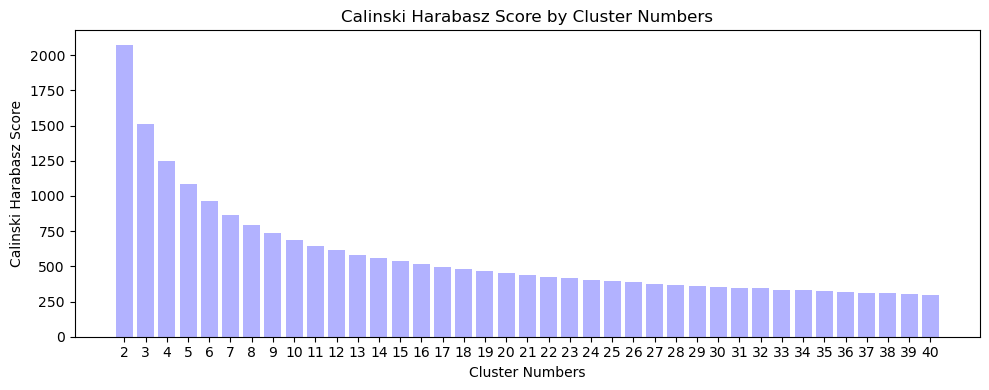

In [12]:
# Visualize the Calinski-Harabasz score
plt.figure(figsize = (10, 4))
plt.bar(scores_df["cluster_num"], scores_df["Calinski Harabasz Score"], color = 'blue', alpha = 0.3)
plt.xticks(cluster_list)
plt.title("Calinski Harabasz Score by Cluster Numbers")
plt.xlabel("Cluster Numbers")
plt.ylabel("Calinski Harabasz Score")
plt.tight_layout()

plt.show()

In [13]:
print("The optimal number of clusters appears to be 2.")

The optimal number of clusters appears to be 2.


# Segment the Data Using the K-means Algorithm

In [14]:
# Segment the Data Using the K-means Algorithm
k_model = KMeans(n_clusters = 2, random_state = 1)
k_model.fit(restaurant_pca_df)
cluster = k_model.predict(restaurant_pca_df)

# Create cluster dataframe
cluster_df = pd.DataFrame(data = cluster, columns = ["Cluster"])
cluster_df.to_csv(Path("./exported_resources/cluster_label_df.csv"), header = True)
cluster_df

,Cluster
0,0
1,1
2,0
3,0
4,1
...,...
8363,0
8364,0
8365,1
8366,0


In [15]:
# Concatenate the "restaurant_pca_df" dataframe and "cluster_df" dataframe
pca_clustered_df = pd.concat([restaurant_pca_df, cluster_df], axis = 1)
pca_clustered_df

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,Cluster
0,-1.602329,-1.717388,1.636562,-1.393867,-1.705817,-0.210651,0.097664,0.326914,0.408310,0
1,0.441447,1.358972,-1.409816,-0.710771,-0.172635,0.511681,0.809583,-0.487749,1.704060,1
2,-0.779930,0.468890,1.343955,-0.353624,0.538145,0.535154,0.998055,2.139401,0.279931,0
3,-2.535516,-0.174292,1.015148,-1.686116,-0.077267,-0.640989,-0.547675,-0.862953,-0.334777,0
4,2.860161,-2.526592,1.211125,-0.760200,0.943812,-0.518266,-1.510619,-1.638053,0.214562,1
...,...,...,...,...,...,...,...,...,...,...
8363,-2.168573,0.060189,-1.092439,0.477991,1.108680,-1.067013,-1.265438,-0.399140,1.338251,0
8364,-1.677503,0.512871,-0.794318,-0.501850,0.174091,0.291397,1.426922,-0.668104,0.547127,0
8365,3.380806,0.677995,0.008023,-0.402776,0.372431,0.014191,0.324511,-1.757077,2.050849,1
8366,-3.407766,-0.334320,-0.686713,0.519816,0.756618,1.255804,0.432478,-1.461543,-0.400274,0


In [16]:
# Concatenate the "restaurant_df_converted" (scaled data) dataframe and "cluster_df" dataframe
restaurant_df_scaled_clustered = pd.concat([restaurant_df_converted, cluster_df], axis = 1)
restaurant_df_scaled_clustered

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes,Cluster
0,-0.014202,-1.276714,1.819441,-0.544861,-0.686274,0.534421,-1.219380,-0.178419,-1.639150,0.576566,...,False,False,False,False,False,True,False,False,True,0
1,-1.390099,0.907389,-1.380216,0.656375,0.351622,-0.371987,0.036038,-0.361285,-1.134352,-0.815332,...,False,False,False,False,False,False,True,False,True,1
2,1.189708,-0.701950,0.027437,-0.231400,0.058746,1.440830,1.190445,-1.637931,-0.085926,0.460574,...,False,False,False,False,True,False,False,True,False,0
3,0.673746,-1.506619,0.254838,-1.124106,-1.126017,0.534421,-1.590955,0.425916,-0.357740,-1.047314,...,False,False,False,False,True,False,False,False,True,0
4,1.533682,1.597106,1.958951,0.230572,0.213665,-0.190705,-1.605385,0.929408,1.195484,-1.317961,...,False,False,False,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,-1.046125,-0.357091,-0.910068,-1.159727,-1.336227,0.171858,-0.515913,1.099394,1.544960,-0.196710,...,True,False,False,True,False,False,False,False,True,0
8364,-0.530163,-0.644473,-0.768466,-0.674191,-0.845917,-0.190705,0.685392,0.011393,-1.095521,-1.124642,...,False,False,False,True,False,False,False,True,False,0
8365,1.189708,1.597106,-0.071614,1.496473,1.489845,-0.734551,-0.313892,0.669276,-0.280079,-1.472616,...,False,False,False,False,True,False,False,False,True,1
8366,-1.562086,-1.679048,-0.234841,-1.376191,-1.557816,-1.640959,0.743112,0.051572,0.224719,-1.317961,...,False,True,False,False,False,False,False,True,False,0


In [17]:
# Check the dataframe
restaurant_df_scaled_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rating                    8368 non-null   float64
 1   Seating Capacity          8368 non-null   float64
 2   Average Meal Price        8368 non-null   float64
 3   Marketing Budget          8368 non-null   float64
 4   Social Media Followers    8368 non-null   float64
 5   Chef Experience Years     8368 non-null   float64
 6   Number of Reviews         8368 non-null   float64
 7   Avg Review Length         8368 non-null   float64
 8   Ambience Score            8368 non-null   float64
 9   Service Quality Score     8368 non-null   float64
 10  Weekend Reservations      8368 non-null   float64
 11  Weekday Reservations      8368 non-null   float64
 12  Revenue                   8368 non-null   float64
 13  Location_Downtown         8368 non-null   bool   
 14  Location